In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

Problem Statement : Predict the quality of Red Wine on a scale of 10, based on fixed acidity, volatile acidity,
    citric acid, pH, residual sugar, chlorides, density, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol

## Data Gathering

In [2]:
wine = pd.read_csv('red wine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine['quality'] = np.where(wine['quality']<6,'poor(less than or equal to 5)','good(more than 5)')

In [6]:
wine['quality'].value_counts()

good(more than 5)                855
poor(less than or equal to 5)    744
Name: quality, dtype: int64

In [7]:
wine['quality'].replace({'poor(less than or equal to 5)':0,'good(more than 5)':1},inplace = True)

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
# sns.pairplot(wine)

In [10]:
wine.corr()['quality']

fixed acidity           0.095093
volatile acidity       -0.321441
citric acid             0.159129
residual sugar         -0.002160
chlorides              -0.109494
free sulfur dioxide    -0.061757
total sulfur dioxide   -0.231963
density                -0.159110
pH                     -0.003264
sulphates               0.218072
alcohol                 0.434751
quality                 1.000000
Name: quality, dtype: float64

In [11]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


## EDA

### 1. fixed acidity

<Axes: >

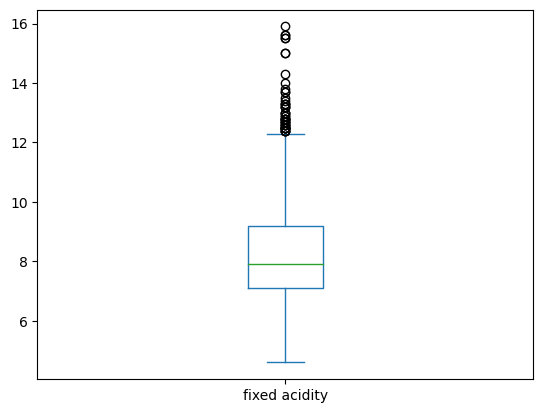

In [12]:
wine['fixed acidity'].plot(kind = 'box')

In [13]:
q1 = wine['fixed acidity'].quantile(0.25)
q3 = wine['fixed acidity'].quantile(0.75)
IQR = q3-q1
upper= q3+1.5*IQR
lower= q1-1.5*IQR

wine['fixed acidity'] = np.where(wine['fixed acidity']>upper,wine['fixed acidity'].quantile(0.5),wine['fixed acidity'])

<Axes: >

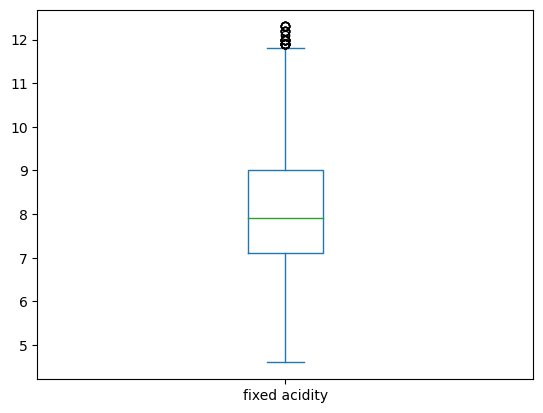

In [14]:
wine['fixed acidity'].plot(kind = 'box')

### 2. volatile acidity

<Axes: >

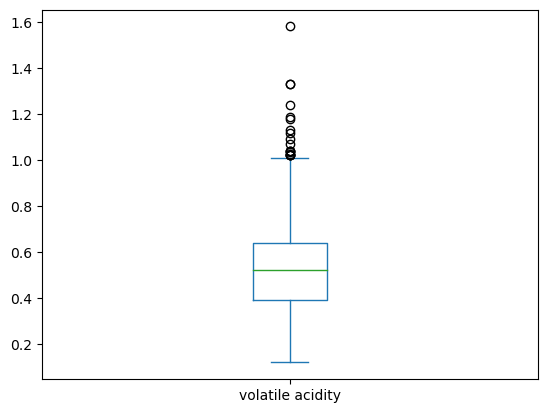

In [15]:
wine['volatile acidity'].plot(kind = 'box')

In [16]:
q1 = wine['volatile acidity'].quantile(0.25)
q3 = wine['volatile acidity'].quantile(0.75)
IQR = q3-q1
upper= q3+1.5*IQR
lower= q1-1.5*IQR

wine['volatile acidity'] = np.where(wine['volatile acidity']>upper,wine['volatile acidity'].mean(),wine['volatile acidity'])

<Axes: >

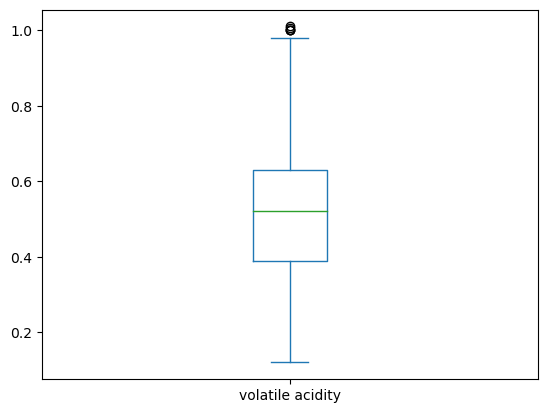

In [17]:
wine['volatile acidity'].plot(kind = 'box')

### 3. citric acid

<Axes: >

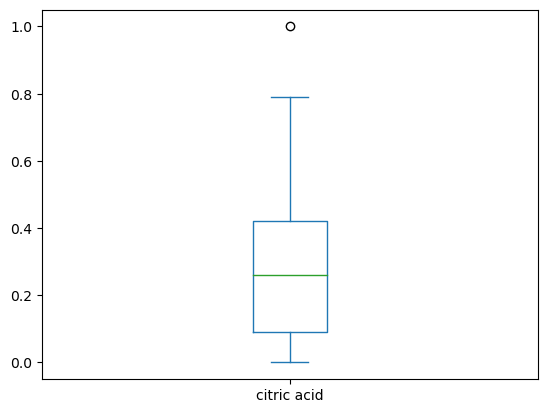

In [18]:
wine['citric acid'].plot(kind = 'box')

In [19]:
q1 = wine['citric acid'].quantile(0.25)
q3 = wine['citric acid'].quantile(0.75)
IQR = q3-q1
upper= q3+1.5*IQR
lower= q1-1.5*IQR

wine['citric acid'] = np.where(wine['citric acid']>upper,wine['citric acid'].mean(),wine['citric acid'])

<Axes: >

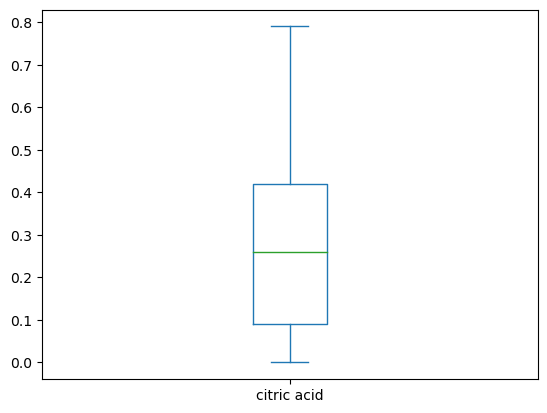

In [20]:
wine['citric acid'].plot(kind = 'box')

### 4. residual sugar

<Axes: >

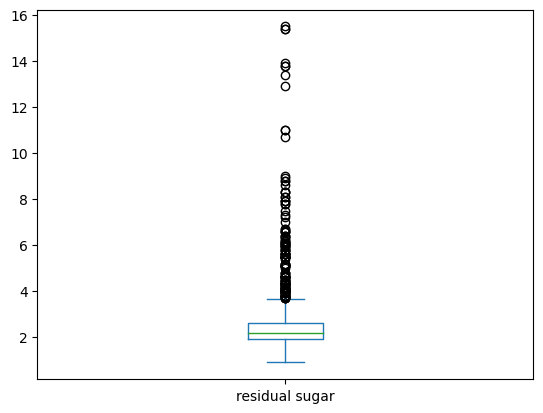

In [21]:
wine['residual sugar'].plot(kind = 'box')

In [22]:
q1 = wine['residual sugar'].quantile(0.25)
q3 = wine['residual sugar'].quantile(0.75)
IQR = q3-q1
upper= q3+1.5*IQR
lower= q1-1.5*IQR

wine['residual sugar'] = np.where(wine['residual sugar']>upper,wine['residual sugar'].quantile(0.5),wine['residual sugar'])

<Axes: >

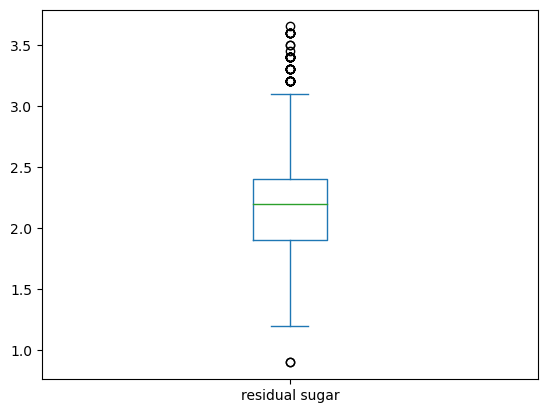

In [23]:
wine['residual sugar'].plot(kind = 'box')

### 5. chlorides

<Axes: >

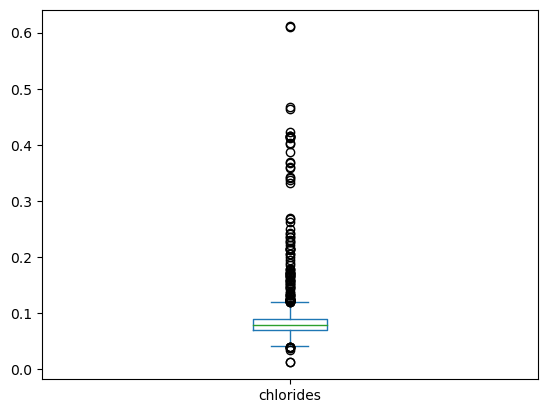

In [24]:
wine['chlorides'].plot(kind = 'box')

In [25]:
q1 = wine['chlorides'].quantile(0.25)
q3 = wine['chlorides'].quantile(0.75)
IQR = q3-q1
upper= q3+1.5*IQR
lower= q1-1.5*IQR

wine['chlorides'] = np.where(~wine['chlorides'].between(lower,upper),wine['chlorides'].quantile(0.5),wine['chlorides'])

<Axes: >

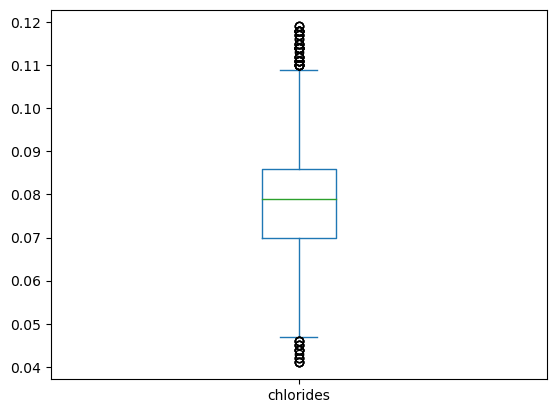

In [26]:
wine['chlorides'].plot(kind = 'box')

### 6. free sulfur dioxide

<Axes: >

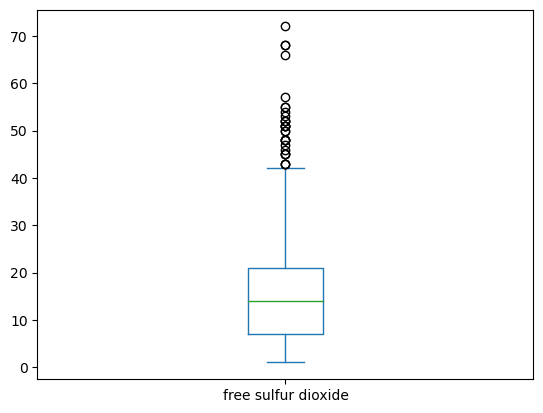

In [27]:
wine['free sulfur dioxide'].plot(kind = 'box')

In [28]:
q1 = wine['free sulfur dioxide'].quantile(0.25)
q3 = wine['free sulfur dioxide'].quantile(0.75)
IQR = q3-q1
upper= q3+1.5*IQR
lower= q1-1.5*IQR

wine['free sulfur dioxide'] = np.where(wine['free sulfur dioxide']>upper,wine['free sulfur dioxide'].quantile(0.5),wine['free sulfur dioxide'])

<Axes: >

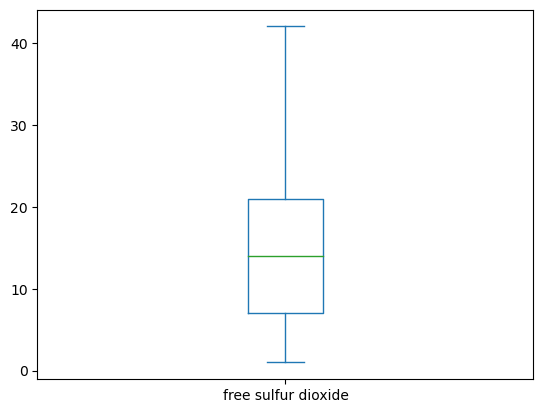

In [29]:
wine['free sulfur dioxide'].plot(kind = 'box')

### 7. total sulfur dioxide

<Axes: >

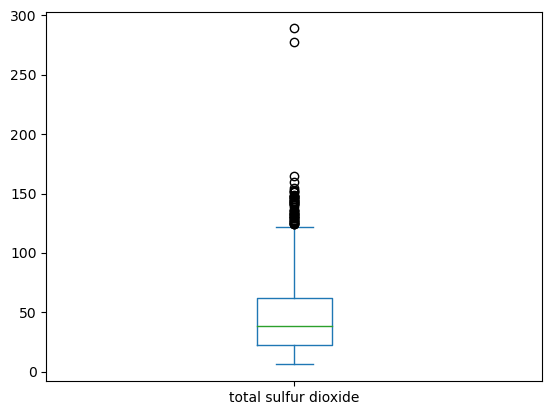

In [30]:
wine['total sulfur dioxide'].plot(kind = 'box')

In [31]:
q1 = wine['total sulfur dioxide'].quantile(0.25)
q3 = wine['total sulfur dioxide'].quantile(0.75)
IQR = q3-q1
upper= q3+1.5*IQR
lower= q1-1.5*IQR

wine['total sulfur dioxide'] = np.where(wine['total sulfur dioxide']>upper,wine['total sulfur dioxide'].quantile(0.5),wine['total sulfur dioxide'])

<Axes: >

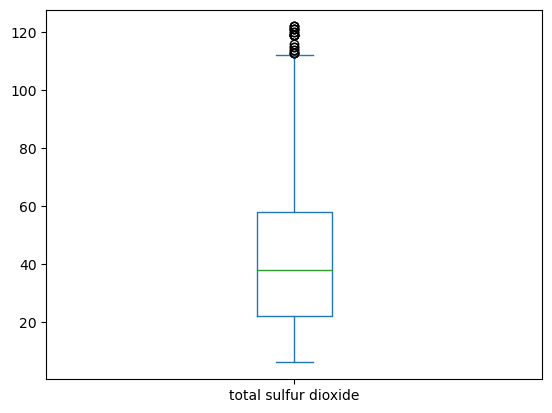

In [32]:
wine['total sulfur dioxide'].plot(kind = 'box')

### 8. density

<Axes: >

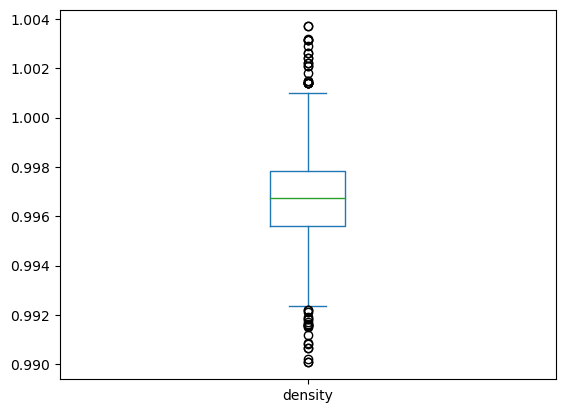

In [33]:
wine['density'].plot(kind = 'box')

In [34]:
q1 = wine['density'].quantile(0.25)
q3 = wine['density'].quantile(0.75)
IQR = q3-q1
upper= q3+1.5*IQR
lower= q1-1.5*IQR

wine['density'] = np.where(~wine['density'].between(lower,upper),wine['density'].mean(),wine['density'])

<Axes: >

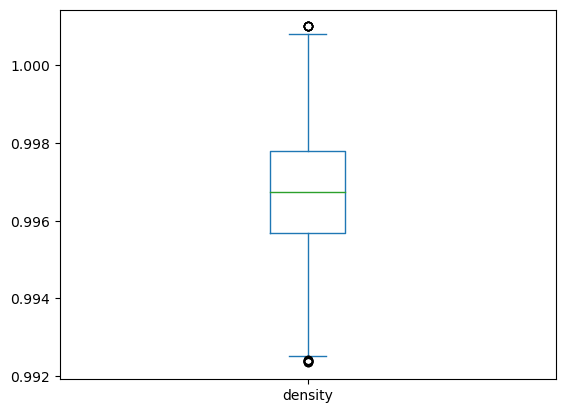

In [35]:
wine['density'].plot(kind = 'box')

### 9. pH

<Axes: >

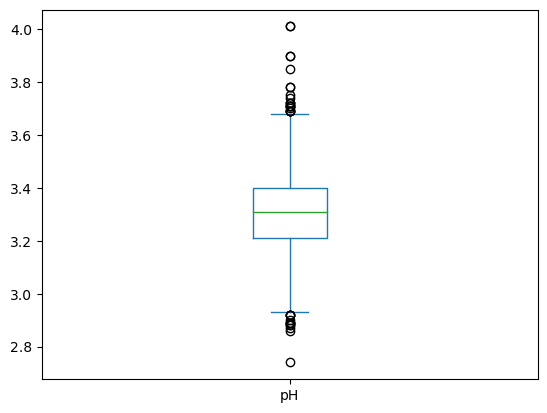

In [36]:
wine['pH'].plot(kind = 'box')

In [37]:
q1 = wine['pH'].quantile(0.25)
q3 = wine['pH'].quantile(0.75)
IQR = q3-q1
upper= q3+1.5*IQR
lower= q1-1.5*IQR

wine['pH'] = np.where(~wine['pH'].between(lower,upper),wine['pH'].mean(),wine['pH'])

<Axes: >

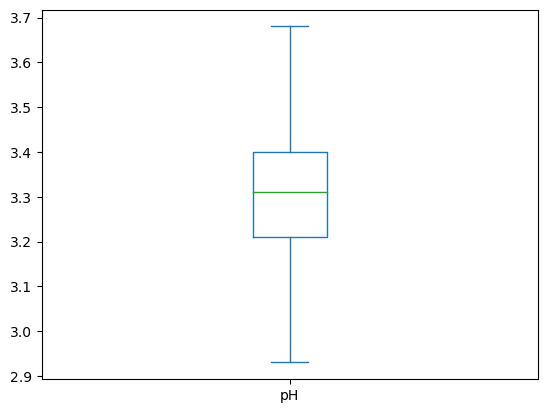

In [38]:
wine['pH'].plot(kind = 'box')

### 10. sulphates

<Axes: >

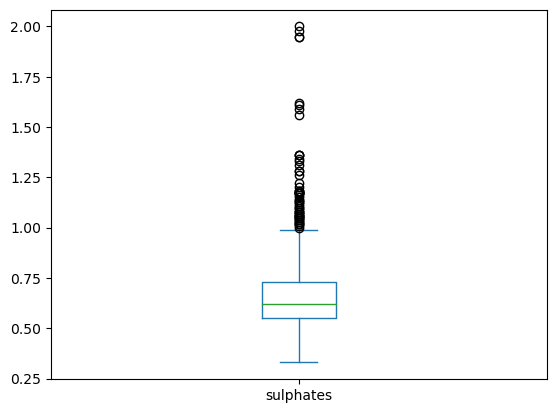

In [39]:
wine['sulphates'].plot(kind = 'box')

In [40]:
q1 = wine['sulphates'].quantile(0.25)
q3 = wine['sulphates'].quantile(0.75)
IQR = q3-q1
upper= q3+1.5*IQR
lower= q1-1.5*IQR

wine['sulphates'] = np.where(wine['sulphates']>upper,wine['sulphates'].quantile(0.5),wine['sulphates'])

<Axes: >

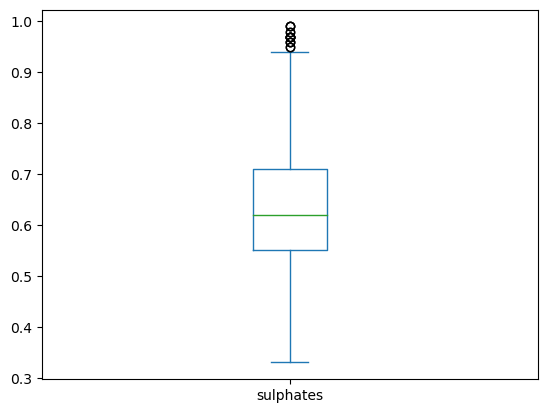

In [41]:
wine['sulphates'].plot(kind = 'box')

### 11. alcohol

<Axes: >

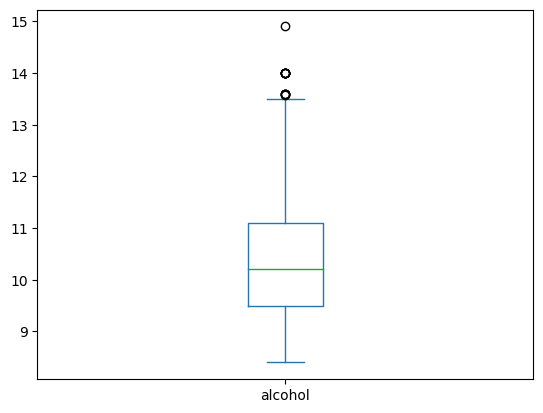

In [42]:
wine['alcohol'].plot(kind = 'box')

In [43]:
q1 = wine['alcohol'].quantile(0.25)
q3 = wine['alcohol'].quantile(0.75)
IQR = q3-q1
upper= q3+1.5*IQR
lower= q1-1.5*IQR

wine['alcohol'] = np.where(wine['alcohol']>upper,wine['alcohol'].quantile(0.5),wine['alcohol'])

<Axes: >

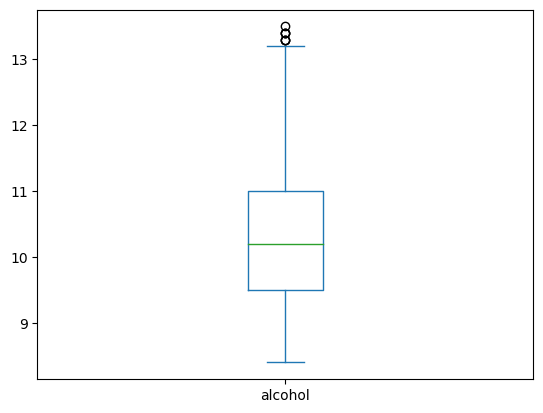

In [44]:
wine['alcohol'].plot(kind = 'box')

### 12. quality

In [45]:
wine['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

## Feature Selection

In [46]:
wine.corr()['quality']

fixed acidity           0.083093
volatile acidity       -0.308697
citric acid             0.162353
residual sugar          0.018247
chlorides              -0.158090
free sulfur dioxide    -0.049681
total sulfur dioxide   -0.193433
density                -0.149549
pH                     -0.018872
sulphates               0.346979
alcohol                 0.433486
quality                 1.000000
Name: quality, dtype: float64

In [47]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [48]:
# sns.pairplot(wine)

## Model Building

### Train Test Split

In [49]:
x = wine.drop('quality',axis = 1)
y = wine['quality']

In [50]:
vif_list = []

In [51]:
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values, i)
    vif_list.append(round(vif,2))

<Axes: >

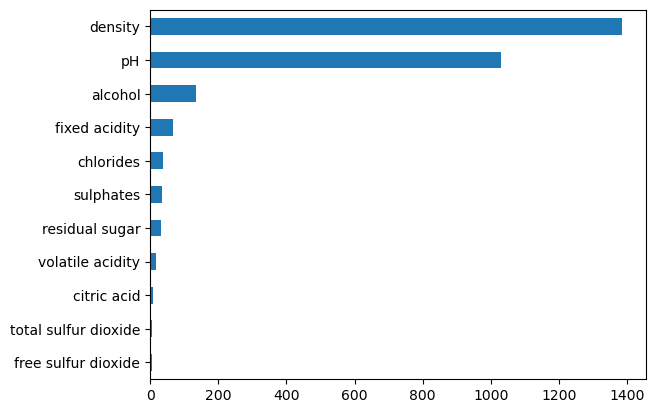

In [52]:
s1 = pd.Series(vif_list, index=x.columns)
s1.sort_values().plot(kind='barh')

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 11,stratify = y)

In [54]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [55]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred = log_reg.predict(x_test)

In [57]:
y_pred_train = log_reg.predict(x_train)

### Evaluation

In [58]:
def evaluation(model,ind_var,actual):
    pred = model.predict(ind_var)
    cl_r = classification_report(actual,pred)
    print('Classification Report : \n',cl_r)
    con_m = confusion_matrix(actual,pred)
    print('Confusion Matrix : \n',con_m)
    acc = accuracy_score(actual,pred)
    print('\nAccuracy of the model is :',acc)
    
    return cl_r,con_m,acc

In [59]:
print('Training Data Accuracy'.center(50,'*'))
print()
train_eval = evaluation(log_reg,x_train,y_train)
print()
print('Testing Data Accuracy'.center(50,'*'))
print()
test_eval = evaluation(log_reg,x_test,y_test)


**************Training Data Accuracy**************

Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       595
           1       0.76      0.74      0.75       684

    accuracy                           0.74      1279
   macro avg       0.73      0.74      0.73      1279
weighted avg       0.74      0.74      0.74      1279

Confusion Matrix : 
 [[434 161]
 [177 507]]

Accuracy of the model is : 0.7357310398749023

**************Testing Data Accuracy***************

Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.76      0.72       149
           1       0.77      0.71      0.74       171

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320

Confusion Matrix : 
 [[113  36]
 [ 50 121]]

Accuracy of the model is : 0.73125


In [60]:
y_pred_proba = log_reg.predict_proba(x_test)

In [61]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_proba[:,1])

Text(0, 0.5, 'True Positive Rate')

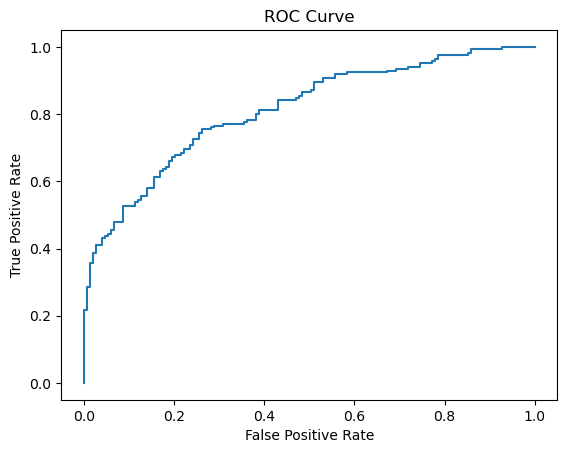

In [62]:
plt.title('ROC Curve')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [63]:
auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
auc_score

0.8121590329290788

## Predicting Output on User Input

In [64]:
x.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [65]:
x.head(1).values

array([[ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
         0.9978,  3.51  ,  0.56  ,  9.4   ]])

In [66]:
fixed_acidity        = 8.9
volatile_acidity     = 0.5
citric_acid          = 0.1
residual_sugar       = 1.5
chlorides            = 0.05
free_sulfur_dioxide  = 8.0
total_sulfur_dioxide = 25.0
density              = 0.89
pH                   = 3.0
sulphates            = 0.6
alcohol              = 8.0

In [67]:
test_array = np.zeros(x.shape[1])
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [68]:
test_array[0] = fixed_acidity
test_array[1] = volatile_acidity
test_array[2] = citric_acid
test_array[3] = residual_sugar
test_array[4] = chlorides
test_array[5] = free_sulfur_dioxide
test_array[6] = total_sulfur_dioxide
test_array[7] = density
test_array[8] = pH
test_array[9] = sulphates
test_array[10] = alcohol

In [69]:
test_array

array([ 8.9 ,  0.5 ,  0.1 ,  1.5 ,  0.05,  8.  , 25.  ,  0.89,  3.  ,
        0.6 ,  8.  ])

In [70]:
result = log_reg.predict([test_array])
if result[0] == 0:
    print(f"Qality of red wine is poor(rated 5 or less than 5 on a scale of 10)")
else :
    print(f"Qality of red wine is good(rated 6 or more than 6 on a scale of 10)")

Qality of red wine is poor(rated 5 or less than 5 on a scale of 10)


In [74]:
project_data = {}
project_data['columns'] = list(x.columns)
project_data

{'columns': ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol']}

## Creating Model and Json File

In [72]:
with open('Logistic_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

In [75]:
with open('project_data.json', 'w') as f:
    json.dump(project_data, f)